In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('varitey_commodity_total.csv')
df

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,03/01/2006,600.0,1300.0,1100.0,81
1,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,05/01/2006,1100.0,1400.0,1300.0,81
2,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,16/01/2006,1500.0,1800.0,1800.0,81
3,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,19/01/2006,700.0,900.0,800.0,81
4,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,24/01/2006,500.0,1400.0,1000.0,81
...,...,...,...,...,...,...,...,...,...,...,...
320318,Gujarat,Ahmedabad,Viramgam,Castor Seed,Castor seed,FAQ,18/10/2024,6525.0,6620.0,6570.0,123
320319,Gujarat,Ahmedabad,Viramgam,Castor Seed,Castor seed,FAQ,19/10/2024,6425.0,6580.0,6500.0,123
320320,Gujarat,Ahmedabad,Viramgam,Cummin Seed(Jeera),Other,FAQ,07/11/2024,21450.0,22200.0,21825.0,42
320321,Gujarat,Ahmedabad,Viramgam,Cummin Seed(Jeera),Other,FAQ,19/10/2024,21850.0,22850.0,22350.0,42


In [5]:
df.isnull().sum()

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(35)

In [7]:
df.drop_duplicates(inplace=True)

df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')

df['Arrival_Day'] = df['Arrival_Date'].dt.day
df['Arrival_Month'] = df['Arrival_Date'].dt.month
df['Arrival_Year'] = df['Arrival_Date'].dt.year

df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Arrival_Day,Arrival_Month,Arrival_Year
0,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,2006-01-03,600.0,1300.0,1100.0,81,3,1,2006
1,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,2006-01-05,1100.0,1400.0,1300.0,81,5,1,2006
2,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,2006-01-16,1500.0,1800.0,1800.0,81,16,1,2006
3,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,2006-01-19,700.0,900.0,800.0,81,19,1,2006
4,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,2006-01-24,500.0,1400.0,1000.0,81,24,1,2006


In [8]:
df.dtypes

State                     object
District                  object
Market                    object
Commodity                 object
Variety                   object
Grade                     object
Arrival_Date      datetime64[ns]
Min_Price                float64
Max_Price                float64
Modal_Price              float64
Commodity_Code             int64
Arrival_Day                int32
Arrival_Month              int32
Arrival_Year               int32
dtype: object

In [9]:
le = LabelEncoder()

catcols = df.select_dtypes(include='object')

for i in catcols:
    df[i] = le.fit_transform(df[i])
    
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Arrival_Day,Arrival_Month,Arrival_Year
0,0,0,0,15,49,0,2006-01-03,600.0,1300.0,1100.0,81,3,1,2006
1,0,0,0,15,49,0,2006-01-05,1100.0,1400.0,1300.0,81,5,1,2006
2,0,0,0,15,49,0,2006-01-16,1500.0,1800.0,1800.0,81,16,1,2006
3,0,0,0,15,49,0,2006-01-19,700.0,900.0,800.0,81,19,1,2006
4,0,0,0,15,49,0,2006-01-24,500.0,1400.0,1000.0,81,24,1,2006


<Axes: >

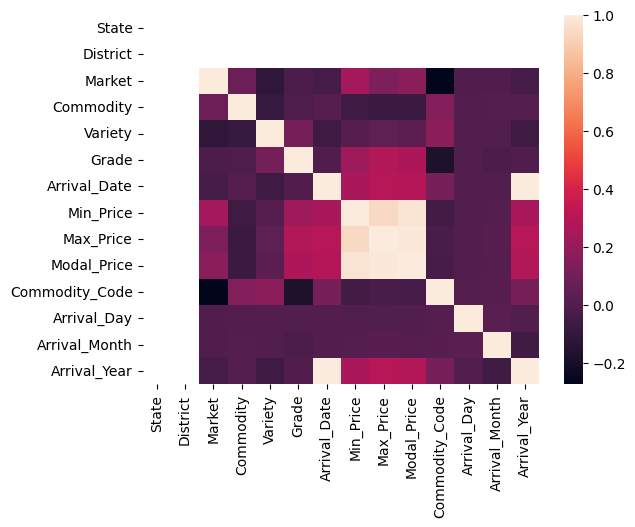

In [10]:
corr = df.corr()

corr['Modal_Price']

sns.heatmap(corr)

In [ ]:
variance = df.drop(columns='Arrival_Date', axis = 1).var()
variance

State             0.000000e+00
District          0.000000e+00
Market            1.510645e+01
Commodity         1.084083e+03
Variety           4.988489e+01
Grade             9.769507e-01
Min_Price         4.977803e+06
Max_Price         8.184484e+06
Modal_Price       6.586802e+06
Commodity_Code    1.183415e+04
Arrival_Day       7.659720e+01
Arrival_Month     1.228270e+01
Arrival_Year      2.911693e+01
dtype: float64

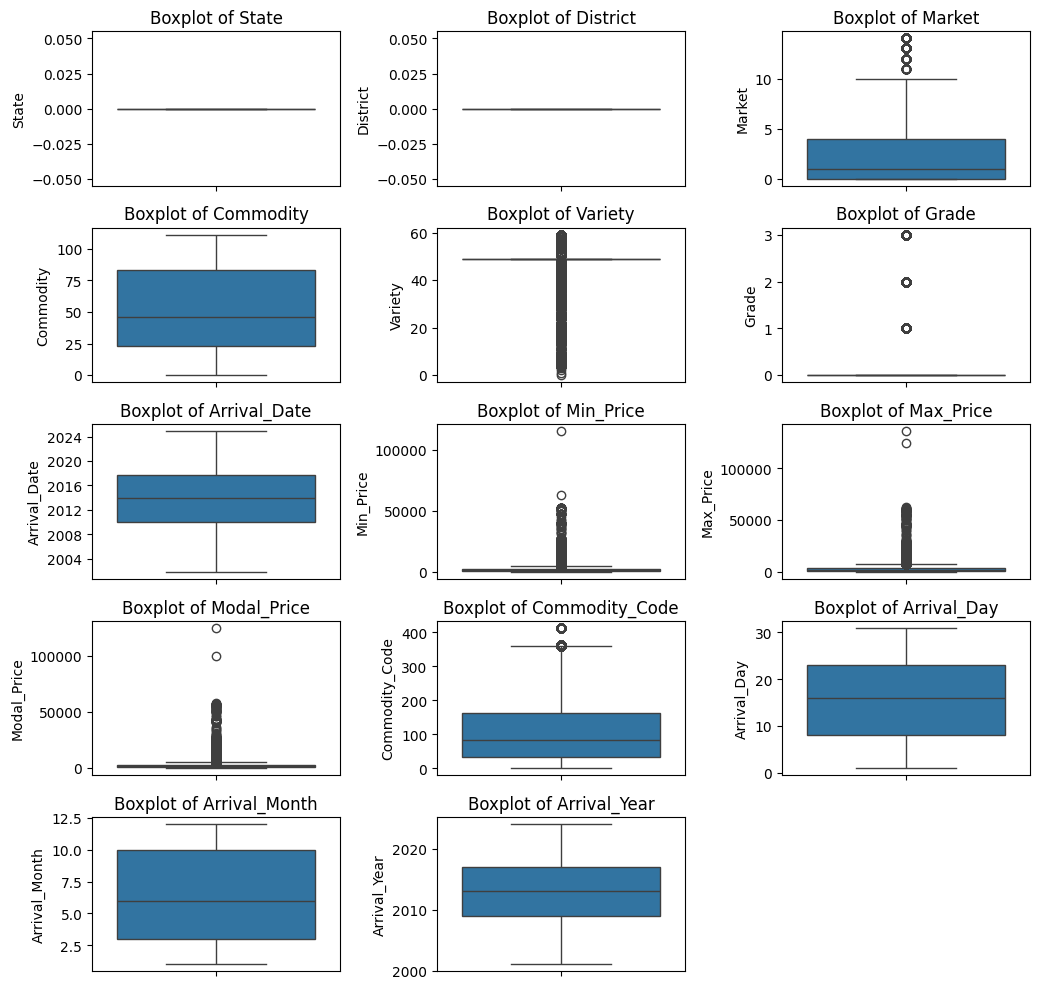

In [ ]:
num_columns = 3
num_plots = len(df.columns)
num_rows = math.ceil(num_plots / num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(3.5 * num_columns, 2 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

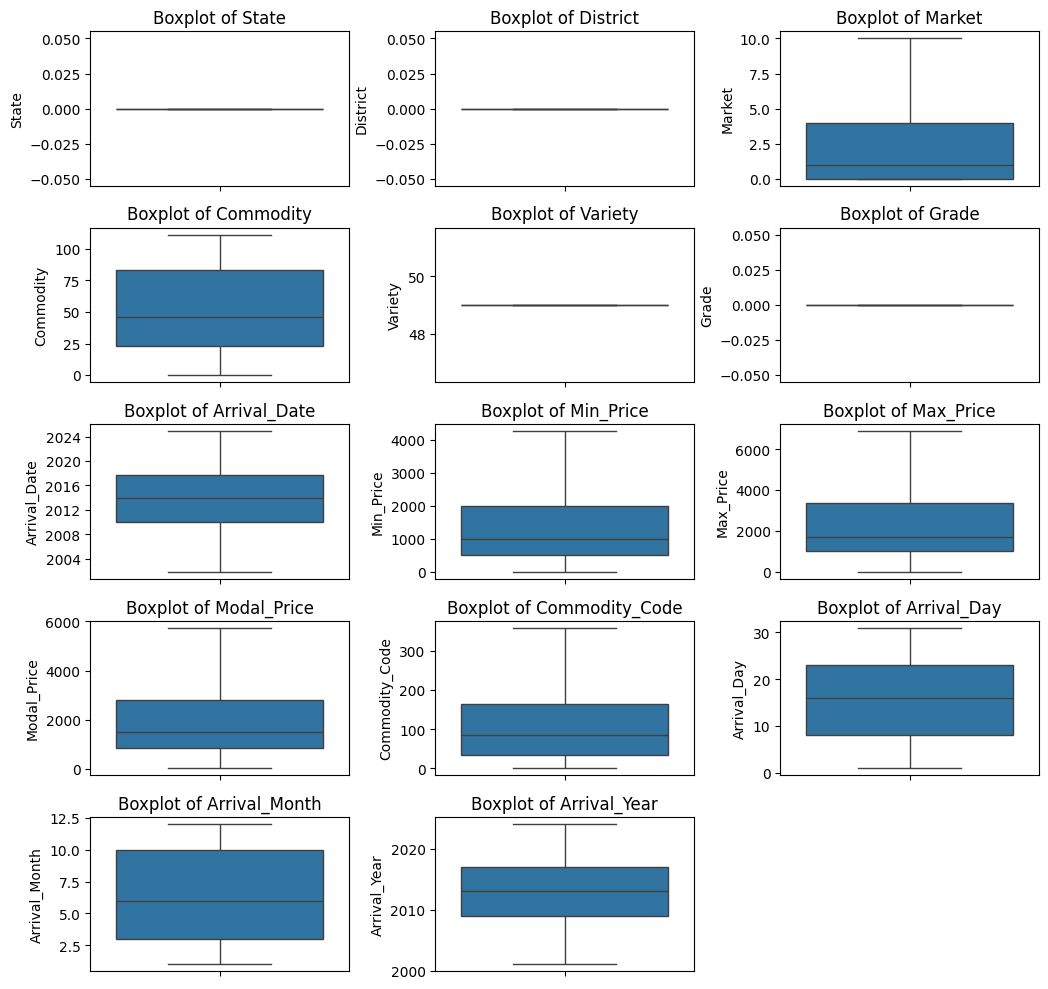

In [ ]:
def iqr_clipping(df, columns, multiplier=1.5):
    df_clipped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clipped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_clipped

outlier_cols = ['Market', 'Variety', 'Grade', 'Min_Price', 'Max_Price', 'Modal_Price','Commodity_Code']

df_clipped = iqr_clipping(df, outlier_cols, multiplier=1.5)

num_columns = 3
num_plots = len(df_clipped.columns)
num_rows = math.ceil(num_plots / num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(3.5 * num_columns, 2 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df_clipped.columns):
    sns.boxplot(data=df_clipped[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df_edited = df_clipped.drop(columns={'Variety', 'Grade', 'Arrival_Date', 'State', 'District'}, axis=1)
df_edited.head()

,Market,Commodity,Min_Price,Max_Price,Modal_Price,Commodity_Code,Arrival_Day,Arrival_Month,Arrival_Year
0,0,15,600.0,1300.0,1100.0,81,3,1,2006
1,0,15,1100.0,1400.0,1300.0,81,5,1,2006
2,0,15,1500.0,1800.0,1800.0,81,16,1,2006
3,0,15,700.0,900.0,800.0,81,19,1,2006
4,0,15,500.0,1400.0,1000.0,81,24,1,2006


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_edited)

pca = PCA()
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print("\nExplained Variance Ratios:")
print(explained_variance_df)


Explained Variance Ratios:
  Principal Component  Explained Variance Ratio
0                 PC1                  0.344525
1                 PC2                  0.146859
2                 PC3                  0.118065
3                 PC4                  0.115055
4                 PC5                  0.109217
5                 PC6                  0.084632
6                 PC7                  0.071872
7                 PC8                  0.009130
8                 PC9                  0.000646


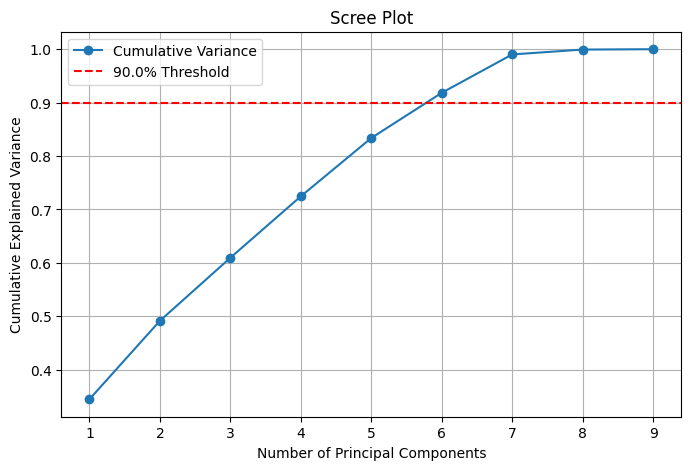

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [ ]:
optimal_pca = PCA(n_components=n_components)
df_pca_transformed = optimal_pca.fit_transform(df_scaled)

print(f"Transformed dataset shape: {df_pca_transformed.shape}")

Transformed dataset shape: (320288, 6)


Prediction Accuracy =  0.9951811013373463
Cross Val Score for 10 Folds =  [0.99506643 0.99537481 0.99541098 0.99514106 0.99537598 0.99513452
 0.9951105  0.99547421 0.99523562 0.99505625]
{'Training MSE': np.float64(11200.933006746354), 'Test MSE': np.float64(12576.833785874227), 'Training R²': 0.9956779513173395, 'Test R²': 0.9951811013373463, 'Overfitting Detected': False}


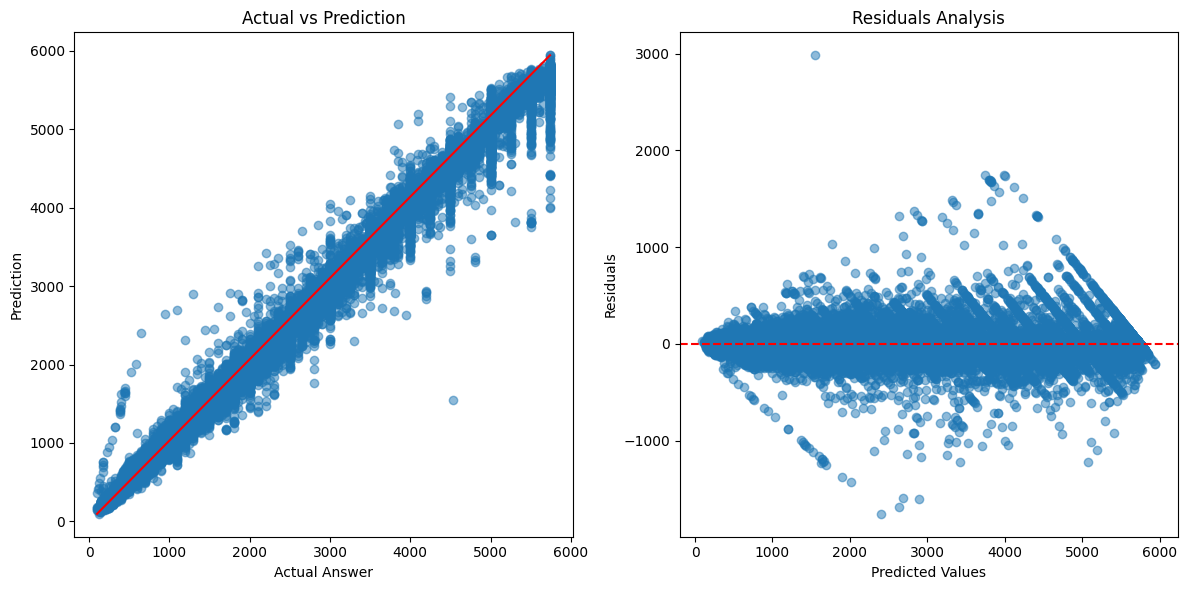

In [ ]:
Features = df_pca_transformed
Labels = df_clipped['Modal_Price']

Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, shuffle=True, random_state=42)

xg = XGBRegressor()
xg.fit(Features_train, Labels_train)
train_pred = xg.predict(Features_train)
pred = xg.predict(Features_test)
acc = cross_val_score(xg, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
residuals_reg = Labels_test - pred

print("Prediction Accuracy = ", xg.score(Features_test,Labels_test))
print("Cross Val Score for 10 Folds = ", acc)

train_mse = mean_squared_error(Labels_train, train_pred)
test_mse_reg = mean_squared_error(Labels_test, pred)
train_r2 = r2_score(Labels_train, train_pred)
test_r2_reg = r2_score(Labels_test, pred)

overfitting_status = {
    "Training MSE": train_mse,
    "Test MSE": test_mse_reg,
    "Training R²": train_r2,
    "Test R²": test_r2_reg,
    "Overfitting Detected": train_r2 > test_r2_reg + 0.05 or test_r2_reg < 0.80
}
print(overfitting_status)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(Labels_test, pred, alpha=0.5)
axs[0].set_xlabel('Actual Answer')
axs[0].set_ylabel('Prediction')
axs[0].plot([min(Labels_test), max(Labels_test)], [min(pred), max(pred)], color='red')
axs[0].set_title('Actual vs Prediction')

axs[1].scatter(pred, residuals_reg, alpha=0.5)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals Analysis')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

Prediction Accuracy =  0.9915960986653682
Cross Val Score for 10 Folds =  [0.99155501 0.99163697 0.99180856 0.99152663 0.99169696 0.99138904
 0.9914043  0.99183917 0.99159176 0.99145082]
{'Training MSE': np.float64(21797.16138602765), 'Test MSE': np.float64(21933.32494365945), 'Training R²': 0.9915892370218197, 'Test R²': 0.9915960986653682, 'Overfitting Detected': False}


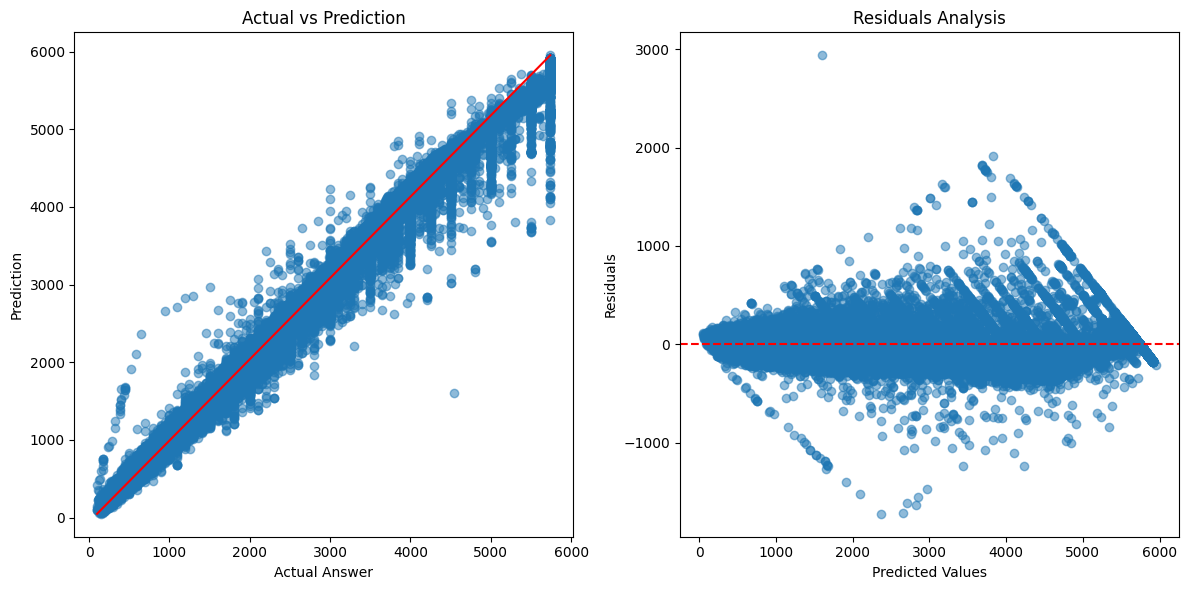

In [ ]:
lr = LinearRegression()
lr.fit(Features_train, Labels_train)
train_pred_lr = lr.predict(Features_train)
pred_lr = lr.predict(Features_test)
acc_lr = cross_val_score(lr, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
residuals_reg_lr = Labels_test - pred_lr

print("Prediction Accuracy = ", lr.score(Features_test,Labels_test))
print("Cross Val Score for 10 Folds = ", acc_lr)

train_mse_lr = mean_squared_error(Labels_train, train_pred_lr)
test_mse_reg_lr = mean_squared_error(Labels_test, pred_lr)
train_r2_lr = r2_score(Labels_train, train_pred_lr)
test_r2_reg_lr = r2_score(Labels_test, pred_lr)

overfitting_status_lr = {
    "Training MSE": train_mse_lr,
    "Test MSE": test_mse_reg_lr,
    "Training R²": train_r2_lr,
    "Test R²": test_r2_reg_lr,
    "Overfitting Detected": train_r2_lr > test_r2_reg_lr + 0.05 or test_r2_reg_lr < 0.80
}
print(overfitting_status_lr)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(Labels_test, pred_lr, alpha=0.5)
axs[0].set_xlabel('Actual Answer')
axs[0].set_ylabel('Prediction')
axs[0].plot([min(Labels_test), max(Labels_test)], [min(pred_lr), max(pred_lr)], color='red')
axs[0].set_title('Actual vs Prediction')

axs[1].scatter(pred_lr, residuals_reg_lr, alpha=0.5)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals Analysis')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

Prediction Accuracy =  0.9926539295721194
Cross Val Score for 10 Folds =  [0.99301297 0.99272272 0.99300861 0.99300572 0.9927671  0.99301541
 0.99284767 0.99326773 0.99274671 0.99275305]
{'Training MSE': np.float64(0.0), 'Test MSE': np.float64(19172.494218814198), 'Training R²': 1.0, 'Test R²': 0.9926539295721194, 'Overfitting Detected': False}


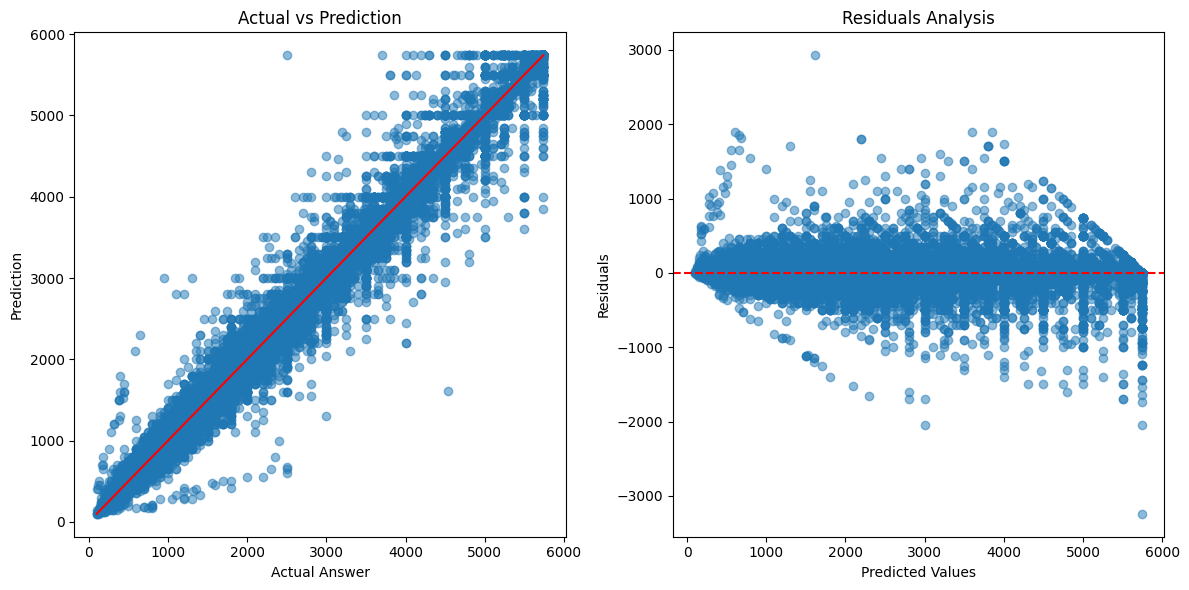

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(Features_train, Labels_train)
train_pred_dt = dt.predict(Features_train)
pred_dt = dt.predict(Features_test)
acc_dt = cross_val_score(dt, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
residuals_reg_dt = Labels_test - pred_dt

print("Prediction Accuracy = ", dt.score(Features_test,Labels_test))
print("Cross Val Score for 10 Folds = ", acc_dt)

train_mse_dt = mean_squared_error(Labels_train, train_pred_dt)
test_mse_reg_dt = mean_squared_error(Labels_test, pred_dt)
train_r2_dt = r2_score(Labels_train, train_pred_dt)
test_r2_reg_dt = r2_score(Labels_test, pred_dt)

overfitting_status_dt = {
    "Training MSE": train_mse_dt,
    "Test MSE": test_mse_reg_dt,
    "Training R²": train_r2_dt,
    "Test R²": test_r2_reg_dt,
    "Overfitting Detected": train_r2_dt > test_r2_reg_dt + 0.05 or test_r2_reg_dt < 0.80
}
print(overfitting_status_dt)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(Labels_test, pred_dt, alpha=0.5)
axs[0].set_xlabel('Actual Answer')
axs[0].set_ylabel('Prediction')
axs[0].plot([min(Labels_test), max(Labels_test)], [min(pred_dt), max(pred_dt)], color='red')
axs[0].set_title('Actual vs Prediction')

axs[1].scatter(pred_dt, residuals_reg_dt, alpha=0.5)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals Analysis')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

Prediction Accuracy =  0.9963345340687356
Cross Val Score for 10 Folds =  [0.99641955 0.9964843  0.99650609 0.99641829 0.99656391 0.99656241
 0.99629302 0.99668195 0.99652719 0.99629884]
{'Training MSE': np.float64(1307.5044945679163), 'Test MSE': np.float64(9566.49205399752), 'Training R²': 0.9994954797002253, 'Test R²': 0.9963345340687356, 'Overfitting Detected': False}


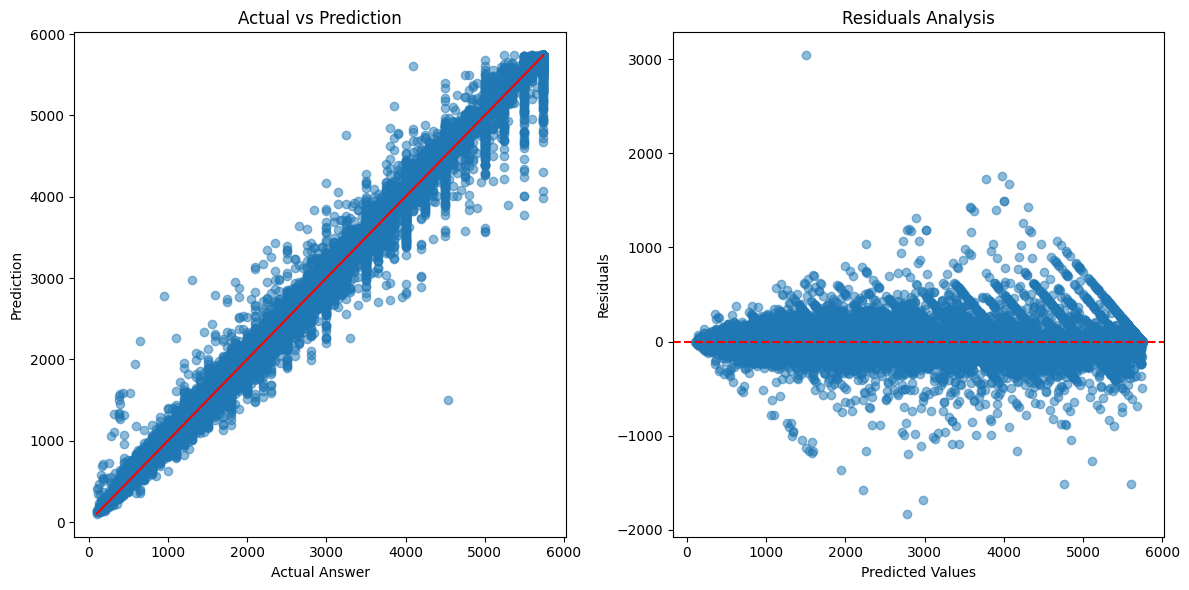

In [ ]:
rf = RandomForestRegressor()
rf.fit(Features_train, Labels_train)
train_pred_rf = rf.predict(Features_train)
pred_rf = rf.predict(Features_test)
acc_rf = cross_val_score(rf, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
residuals_reg_rf = Labels_test - pred_rf

print("Prediction Accuracy = ", rf.score(Features_test,Labels_test))
print("Cross Val Score for 10 Folds = ", acc_rf)

train_mse_rf = mean_squared_error(Labels_train, train_pred_rf)
test_mse_reg_rf = mean_squared_error(Labels_test, pred_rf)
train_r2_rf = r2_score(Labels_train, train_pred_rf)
test_r2_reg_rf = r2_score(Labels_test, pred_rf)

overfitting_status_rf = {
    "Training MSE": train_mse_rf,
    "Test MSE": test_mse_reg_rf,
    "Training R²": train_r2_rf,
    "Test R²": test_r2_reg_rf,
    "Overfitting Detected": train_r2_rf > test_r2_reg_rf + 0.05 or test_r2_reg_rf < 0.80
}
print(overfitting_status_rf)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(Labels_test, pred_rf, alpha=0.5)
axs[0].set_xlabel('Actual Answer')
axs[0].set_ylabel('Prediction')
axs[0].plot([min(Labels_test), max(Labels_test)], [min(pred_rf), max(pred_rf)], color='red')
axs[0].set_title('Actual vs Prediction')

axs[1].scatter(pred_rf, residuals_reg_rf, alpha=0.5)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals Analysis')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

Prediction Accuracy =  0.992910680470596
Cross Val Score for 10 Folds =  [0.99285751 0.99293641 0.99307508 0.99279439 0.99318483 0.99274274
 0.99280707 0.99318543 0.99292021 0.99278668]
{'Training MSE': np.float64(18089.97980667958), 'Test MSE': np.float64(18502.400572823917), 'Training R²': 0.9930197088630274, 'Test R²': 0.992910680470596, 'Overfitting Detected': False}


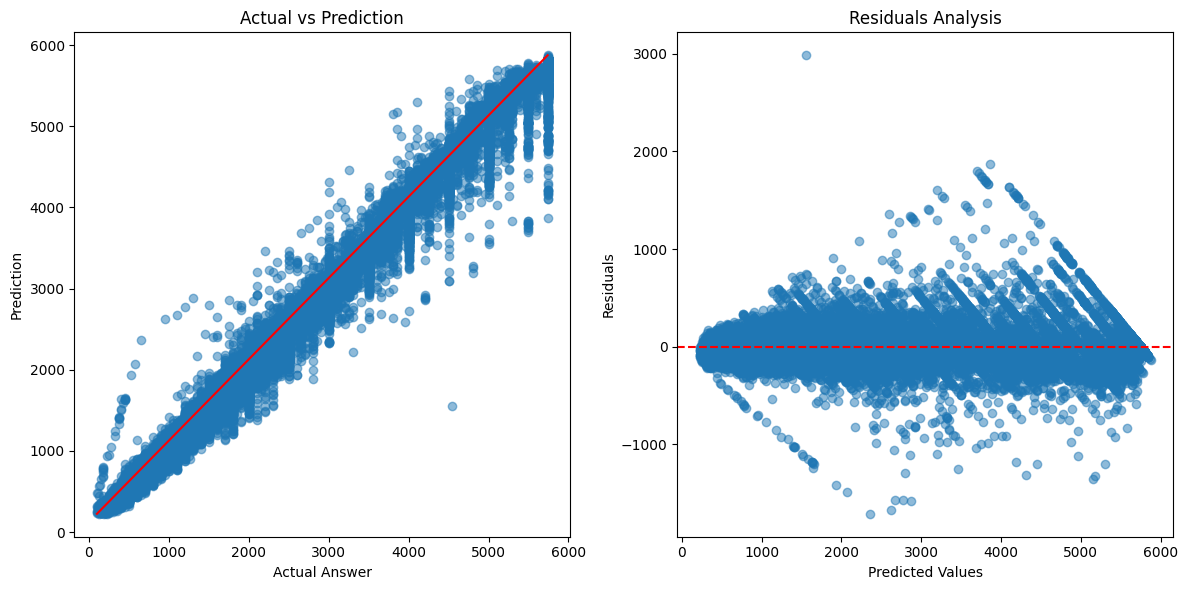

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(Features_train, Labels_train)
train_pred_gb = gb.predict(Features_train)
pred_gb = gb.predict(Features_test)
acc_gb = cross_val_score(gb, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
residuals_reg_gb = Labels_test - pred_gb

print("Prediction Accuracy = ", gb.score(Features_test,Labels_test))
print("Cross Val Score for 10 Folds = ", acc_gb)

train_mse_gb = mean_squared_error(Labels_train, train_pred_gb)
test_mse_reg_gb = mean_squared_error(Labels_test, pred_gb)
train_r2_gb = r2_score(Labels_train, train_pred_gb)
test_r2_reg_gb = r2_score(Labels_test, pred_gb)

overfitting_status_gb = {
    "Training MSE": train_mse_gb,
    "Test MSE": test_mse_reg_gb,
    "Training R²": train_r2_gb,
    "Test R²": test_r2_reg_gb,
    "Overfitting Detected": train_r2_gb > test_r2_reg_gb + 0.05 or test_r2_reg_gb < 0.80
}
print(overfitting_status_gb)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(Labels_test, pred_gb, alpha=0.5)
axs[0].set_xlabel('Actual Answer')
axs[0].set_ylabel('Prediction')
axs[0].plot([min(Labels_test), max(Labels_test)], [min(pred_gb), max(pred_gb)], color='red')
axs[0].set_title('Actual vs Prediction')

axs[1].scatter(pred_gb, residuals_reg_gb, alpha=0.5)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals Analysis')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 256230, number of used features: 6
[LightGBM] [Info] Start training from score 2062.013269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 288259, number of used features: 6
[LightGBM] [Info] Start training from score 2062.482863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

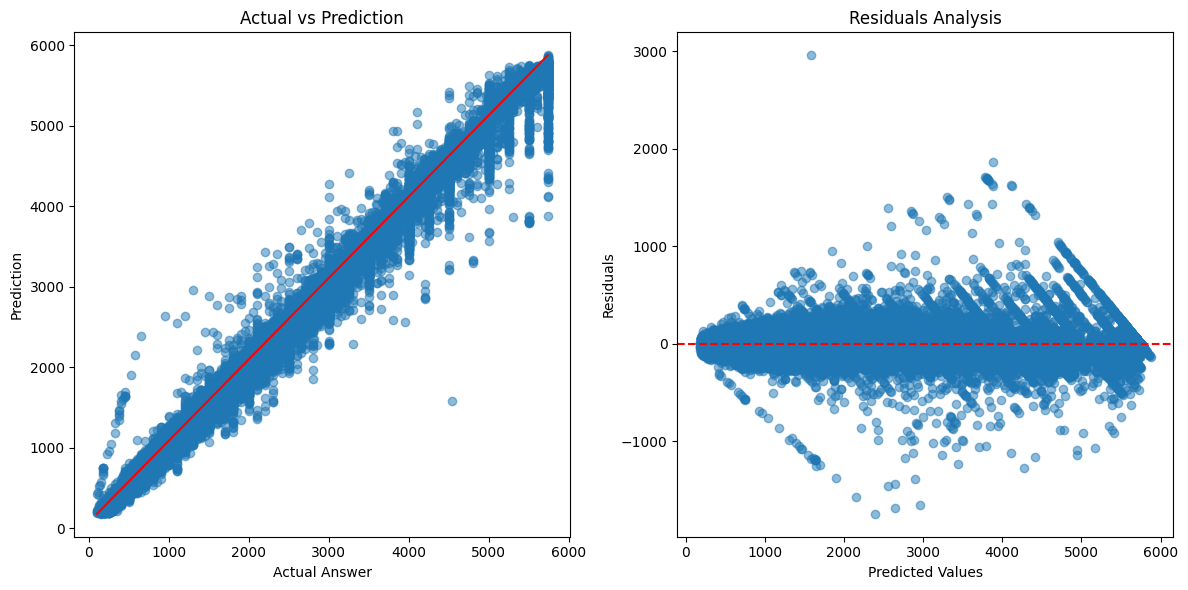

In [ ]:
lgbm = LGBMRegressor()
lgbm.fit(Features_train, Labels_train)
train_pred_lgbm = lgbm.predict(Features_train)
pred_lgbm = lgbm.predict(Features_test)
acc_lgbm = cross_val_score(lgbm, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
residuals_reg_lgbm = Labels_test - pred_lgbm

print("Prediction Accuracy = ", lgbm.score(Features_test,Labels_test))
print("Cross Val Score for 10 Folds = ", acc_lgbm)

train_mse_lgbm = mean_squared_error(Labels_train, train_pred_lgbm)
test_mse_reg_lgbm = mean_squared_error(Labels_test, pred_lgbm)
train_r2_lgbm = r2_score(Labels_train, train_pred_lgbm)
test_r2_reg_lgbm = r2_score(Labels_test, pred_lgbm)

overfitting_status_lgbm = {
    "Training MSE": train_mse_lgbm,
    "Test MSE": test_mse_reg_lgbm,
    "Training R²": train_r2_lgbm,
    "Test R²": test_r2_reg_lgbm,
    "Overfitting Detected": train_r2_lgbm > test_r2_reg_lgbm + 0.05 or test_r2_reg_lgbm < 0.80
}
print(overfitting_status_lgbm)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(Labels_test, pred_lgbm, alpha=0.5)
axs[0].set_xlabel('Actual Answer')
axs[0].set_ylabel('Prediction')
axs[0].plot([min(Labels_test), max(Labels_test)], [min(pred_lgbm), max(pred_lgbm)], color='red')
axs[0].set_title('Actual vs Prediction')

axs[1].scatter(pred_lgbm, residuals_reg_lgbm, alpha=0.5)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals Analysis')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()